### Guided Practice: Logit Function and Odds

In [6]:
import numpy as np

def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

IndentationError: expected an indented block (<ipython-input-6-10730b5b0431>, line 6)

In [7]:
# plot out the logit function and sigmoid function

%matplotlib inline
import matplotlib.pyplot as plt
xaxis = np.linspace(0,1,60000)
y = logit_func(xaxis)
plt.plot(xaxis,y)

NameError: name 'logit_func' is not defined

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
xaxis = np.linspace(-6,6,60)
y = sigmoid_func(xaxis)
plt.plot(xaxis,y)

NameError: name 'sigmoid_func' is not defined

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [15]:
lm = LogisticRegression()

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [16]:
df["rank"].unique()

array([3, 1, 4, 2])

In [17]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [18]:
df = df.join(pd.get_dummies(df['rank'],prefix="prestige"))

In [19]:
df.head()

,admit,gre,gpa,rank,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [20]:
lm.fit(df[['gre', 'gpa', "prestige_1", "prestige_2", "prestige_3",]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print lm.coef_
print lm.intercept_
print df.admit.mean()


[[  1.63913356e-03   4.33354115e-04   1.15220976e+00   5.14395667e-01
   -3.62326171e-02]]
[-2.09315183]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [28]:
feature_set = df[['gre', 'gpa', "prestige_1", "prestige_2", "prestige_3",]]


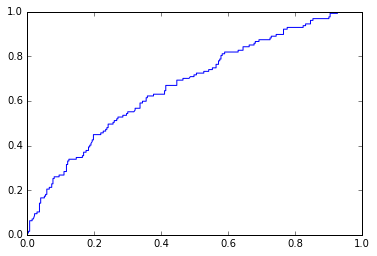

In [27]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [31]:
roc_auc_score(df['admit'], lm.predict(feature_set))

0.55914164575581893

In [32]:
from sklearn.metrics import classification_report

print classification_report(df['admit'], lm.predict(feature_set), target_names=['admitted', 'not-admitted'])

              precision    recall  f1-score   support

    admitted       0.71      0.95      0.81       273
not-admitted       0.59      0.17      0.27       127

 avg / total       0.67      0.70      0.64       400



### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [33]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')

In [ ]:
lm = LogisticRegression()
# Insert the code to do your fitting and prediction. Dont forget to include cross-validation
# Try out different metrics.